## only for regular grid !!!

In [1]:
from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=40)
cluster

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://10.32.16.243:46699
distributed.scheduler - INFO -   dashboard at:                     :8787


In [2]:
## path for mdules
import sys
sys.path.insert(0,"/home/jovyan/xscale")
import xscale


sys.path.insert(0,"/home/jovyan/eNATL60-plots-paper/common-lib/")
import GriddedData

## imports

import numpy as np
import numpy.ma as ma
import xarray as xr
import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as mplcm
seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

import glob
import os 

%matplotlib inline

In [3]:
import gcsfs
fs = gcsfs.GCSFileSystem('pangeo-181919', requester_pays=True)


In [4]:
zmap_grid = fs.get_mapper('pangeo-meom/eNATL60-I/eNATL60-mesh-mask')
ds_grid = xr.open_zarr(zmap_grid)


distributed.scheduler - INFO - Register tcp://10.32.43.28:46799
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.43.28:46799
distributed.core - INFO - Starting established connection


In [5]:
zmap_u = fs.get_mapper('pangeo-meom/eNATL60-BLBT02-SSU-1h')
ds_u = xr.open_zarr(zmap_u)


In [6]:
zmap_v = fs.get_mapper('pangeo-meom/eNATL60-BLBT02-SSV-1h')
ds_v = xr.open_zarr(zmap_v)


In [7]:
navlat= ds_grid['nav_lat']
navlon= ds_grid['nav_lon']
e1u=ds_grid.e1u[0]
e1v=ds_grid.e1v[0]
e2u=ds_grid.e2u[0]
e2v=ds_grid.e2v[0]
ff=ds_grid.ff[0]


In [8]:
    print('Select dates in zarr')
    u=ds_u.sel(time_counter=slice('2010-03-01','2010-03-31'))['sozocrtx']
    v=ds_v.sel(time_counter=slice('2010-03-01','2010-03-31'))['somecrty']


Select dates in zarr


distributed.scheduler - INFO - Register tcp://10.32.27.3:45699
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.27.3:45699
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.27.4:41759
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.27.4:41759
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.26.3:43251
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.26.3:43251
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.26.2:39383
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.26.2:39383
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.34.3:37803
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.34.3:37803
distributed.core - INFO

In [9]:
u

<xarray.DataArray 'sozocrtx' (time_counter: 744, y: 4729, x: 8354)>
dask.array<getitem, shape=(744, 4729, 8354), dtype=float32, chunksize=(24, 120, 120), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(296, 1045), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-03-01T00:30:00 ... 2010-03-31T23:30:00
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 40 s)
    interval_operation:  40 s
    interval_write:      1 h
    long_name:           ocean surface current along i-axis
    online_operation:    average
    units:               m/s

In [10]:
u_group=u.groupby_bins('x',np.arange(0,8354,60))

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/common.py:736: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  "include_lowest": include_lowest,


In [13]:
u_coarsex=u_group.mean(dim='x')

In [14]:
u_coarsex

<xarray.DataArray 'sozocrtx' (time_counter: 744, y: 4729, x_bins: 139)>
dask.array<transpose, shape=(744, 4729, 139), dtype=float32, chunksize=(24, 120, 1), chunktype=numpy.ndarray>
Coordinates:
  * x_bins         (x_bins) object (0, 60] (60, 120] ... (8280, 8340]
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-03-01T00:30:00 ... 2010-03-31T23:30:00
Dimensions without coordinates: y

In [15]:
u_coarsexy=u_coarsex.groupby_bins('y',np.arange(0,4729,60)).mean(dim='y')

In [16]:
u_coarsexy

<xarray.DataArray 'sozocrtx' (time_counter: 744, y_bins: 78, x_bins: 139)>
dask.array<transpose, shape=(744, 78, 139), dtype=float32, chunksize=(24, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * y_bins         (y_bins) object (0, 60] (60, 120] ... (4620, 4680]
  * x_bins         (x_bins) object (0, 60] (60, 120] ... (8280, 8340]
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-03-01T00:30:00 ... 2010-03-31T23:30:00

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


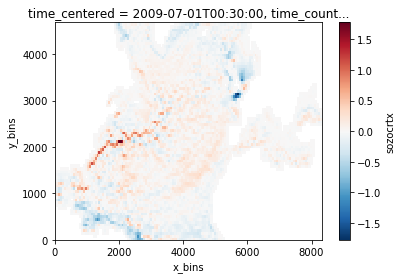

In [17]:
u_coarsexy[0].plot()

In [18]:
cluster.close()

distributed.scheduler - INFO - Remove worker tcp://10.32.29.3:33625
distributed.core - INFO - Removing comms to tcp://10.32.29.3:33625
distributed.scheduler - INFO - Remove worker tcp://10.32.32.2:40117
distributed.core - INFO - Removing comms to tcp://10.32.32.2:40117
distributed.scheduler - INFO - Remove worker tcp://10.32.15.2:40509
distributed.core - INFO - Removing comms to tcp://10.32.15.2:40509
distributed.scheduler - INFO - Remove worker tcp://10.32.24.2:42551
distributed.core - INFO - Removing comms to tcp://10.32.24.2:42551
distributed.scheduler - INFO - Remove worker tcp://10.32.24.3:44973
distributed.core - INFO - Removing comms to tcp://10.32.24.3:44973
distributed.scheduler - INFO - Remove worker tcp://10.32.18.3:36933
distributed.core - INFO - Removing comms to tcp://10.32.18.3:36933
distributed.scheduler - INFO - Remove worker tcp://10.32.13.2:44589
distributed.core - INFO - Removing comms to tcp://10.32.13.2:44589
distributed.scheduler - INFO - Remove worker tcp://10.3